In [1]:
import matplotlib.pyplot as plt
import numpy as np

file1a="mushroom_sample1.ppm" #Hypholoma fasciculare
file1b="mushroom_sample_unknown.ppm" # is also Hypholoma fasciculare
file2="mushroom_sample2.ppm" #Hypholoma capnoide
file1=file1b

def read_ppm(filename,path='../data/'):
    
    with open(path+filename) as f:
        f.readline()
        f.readline()
        line=f.readline()
        values=line.split()
        dim=np.array([int(values[0]),int(values[1])])
        nline=3*dim[0]*dim[1]
        i=0
        allowed_range=[0,255]
        fill_value=255
        rgb=np.empty(3*dim[0]*dim[1])
        while i<nline:
            line=f.readline()
            rgb[i]=int(line)
            i=i+1
        rgb=np.reshape(rgb,newshape=[dim[1],dim[0],3])
    return rgb
img1=read_ppm(file1)
img2=read_ppm(file2)
RED=0
GREEN=1
BLUE=2
COLOR=GREEN



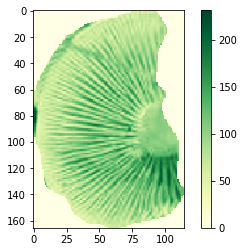

In [2]:
# make brightest parts 'darkest green' by 255- img1 255- img2
plt.imshow(255-img1[:,:,COLOR],cmap=plt.cm.YlGn)
plt.colorbar()
plt.show()

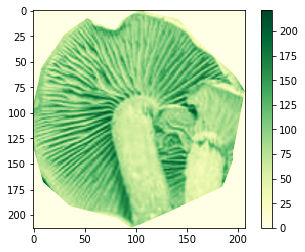

In [3]:
plt.imshow(255-img2[:,:,COLOR],cmap=plt.cm.YlGn)
plt.colorbar()
plt.show()


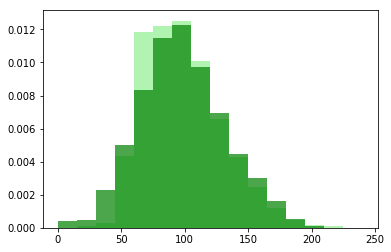

mean and stddev 1:  98.38683955068645 30.556098192434785
mean and stddev 2:  97.90641341588027 33.820418655294404
difference:  0.48042613480618
1.5259624231077458 0.12702972274904178


In [4]:
# make highest values (in image the whitest part) into lowest values
# so that the more green in the mushroom color the larger the value
green1=255-np.reshape(img1[:,:,COLOR],newshape=np.size(img1[:,:,COLOR]))
isuse1=green1>0
np.histogram(green1[isuse1])
green2=255-np.reshape(img2[:,:,COLOR],newshape=np.size(img2[:,:,COLOR]))
isuse2=green2>0
bins=np.arange(0,255,15)
plt.hist(green1[isuse1],bins=bins,alpha=0.7,color='lightgreen',density=True)
plt.hist(green2[isuse2],bins=bins,alpha=0.7,color='green',density=True)
plt.show()

from scipy.stats import ttest_ind

tval,pval=ttest_ind(green1[isuse1],green2[isuse2],equal_var=False)
m1=np.mean(green1[isuse1])
m2=np.mean(green2[isuse2])
s1=np.std(green1[isuse1])
s2=np.std(green2[isuse2])
d=m1-m2
print ("mean and stddev 1: ",m1,s1)
print ("mean and stddev 2: ",m2,s2)
print ("difference: ",d)
print (tval,pval)

In [5]:
img1.reshape(img1.size)


array([255., 255., 255., ..., 255., 255., 255.])